In [16]:
import numpy as np

In [17]:
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)] 
c = []

import time
start = time.time()

for i in range(len(a)):
    c.append(a[i] + b[i])

t1 = time.time() - start
t1

1.3659148216247559

In [18]:
a = np.arange(10000000)
b = np.arange(10000000, 20000000)
import time
start = time.time()
c = a + b
t2 = time.time()-start
t2

0.07474327087402344

In [19]:
print(t1 / t2)

18.274753106897695


NumPy is faster than Python lists because of several key reasons:

### 1. **Memory Efficiency (Contiguous Storage)**
   - NumPy arrays are stored in contiguous memory blocks, unlike Python lists which are pointers to objects. This allows NumPy to access and manipulate data more efficiently.
   - Python lists store each element as an individual Python object, adding overhead (memory for the object and type information), whereas NumPy arrays store raw numerical data in a much more compact form.

### 2. **Vectorization**
   - NumPy uses vectorized operations, meaning operations are applied to entire arrays at once, without explicit loops. This is achieved through low-level implementations in C and Fortran.
   - Python lists require explicit loops in Python (which is slower), whereas NumPy leverages optimized C-based operations, avoiding the loop overhead.

   Example:
   ```python
   # Python list addition (slow, requires a loop)
   result = [a[i] + b[i] for i in range(len(a))]

   # NumPy addition (fast, vectorized)
   result = a + b
   ```

### 3. **Optimized for Numerical Computation**
   - NumPy is designed specifically for numerical and scientific computations, so it is highly optimized for operations like addition, multiplication, and matrix operations.
   - These optimizations include SIMD (Single Instruction, Multiple Data) instructions, multi-threading, and efficient memory management.

### 4. **Low-Level Implementation**
   - NumPy operations are implemented in lower-level languages like C, which are much faster than the interpreted Python code.
   - The Python interpreter adds overhead when working with lists, while NumPy avoids this overhead by running operations at the compiled, lower level.

### 5. **Avoids Type-Checking Overhead**
   - Python lists can store mixed data types, so every operation must check the type of each element. NumPy arrays are homogeneous (all elements have the same type), which means no type-checking is needed during computations, leading to faster execution.

### Summary:
- **NumPy** is optimized for performance by using contiguous memory storage, vectorized operations, and low-level C implementations.
- **Python lists**, on the other hand, are more general-purpose, storing data as individual Python objects with more overhead and requiring explicit loops for operations.

In [28]:
a = [i for i in range(10000000)]
import sys
s1 = sys.getsizeof(a)
s1

89095160

In [29]:
a = np.arange(10000000)
s2 = sys.getsizeof(a)
s2

40000112

In [30]:
s1/s2

2.2273727633562626

The **size** and **storage** efficiency of NumPy arrays versus Python lists can be compared based on how they handle memory and data storage:

### 1. **Memory Usage (Size)**
   - **Python Lists**: Each element in a Python list is a full-fledged Python object, which means it includes additional metadata like type information, reference counters, and other object overhead. Each element is essentially a pointer to a Python object stored elsewhere in memory.
   - **NumPy Arrays**: In contrast, NumPy arrays store elements as raw data in contiguous blocks of memory without additional object overhead. The elements are of a fixed type (homogeneous), allowing for much more compact storage.


### 2. **Storage Comparison**
Let’s break down the storage differences:

- **Python Lists**:
  - Each integer in a Python list takes about **28 bytes** on a 64-bit system.
  - A list of 1 million integers will take approximately **28 MB** (each integer is an object, including the object overhead).

- **NumPy Arrays**:
  - Each integer in a NumPy array of type `int32` takes **4 bytes** (since it’s stored as a raw 32-bit integer).
  - A NumPy array of 1 million integers will take only **4 MB** of memory, as it avoids the object overhead.


### Summary:
- **Python lists** require significantly more memory (due to object overhead, pointers, and dynamic typing).
- **NumPy arrays** are much more memory-efficient, storing data in contiguous blocks without extra object overhead and fixed data types.

This difference in storage is one of the reasons why NumPy is preferred for handling large datasets, especially for numerical computations.

In [40]:
a2 = np.arange(20).reshape(5,4)
print(a2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [41]:
#if we ask to print 2nd 4th row the we can do :
print(a2[ 1::2 ,: ])

[[ 4  5  6  7]
 [12 13 14 15]]


In [42]:
#but we cant do 2nd and 5th row bcz they arent alternate odd or even
# what is we want to acces only 2nd and 456th row out of 500 rows in matrix for that we can use fancy indexing

Fancy indexing in NumPy refers to the ability to access and modify elements of an array using other arrays or sequences of integers, rather than just using slices or single indices. This feature allows for more flexible data manipulation and retrieval.

### Key Features of Fancy Indexing

1. **Array of Indices**: In fancy indexing, you can use an array (or list) of indices to access multiple elements of an array simultaneously. For example, if you have a NumPy array and you provide a list of indices, NumPy returns a new array containing the values at those specified indices.

2. **Boolean Indexing**: Another form of fancy indexing involves using boolean arrays. If you have a boolean array that is the same shape as the original array, you can use it to select elements that correspond to `True` values. This is particularly useful for filtering data based on certain conditions.

3. **Higher Dimensions**: Fancy indexing can be applied to multi-dimensional arrays. You can use separate arrays of indices for each dimension to select specific elements or slices. This allows for complex data manipulation in high-dimensional spaces.

4. **Performance**: Fancy indexing can sometimes lead to a performance overhead compared to regular indexing or slicing because it may involve creating copies of data. However, it allows for more expressive and concise code.

5. **Assignment**: You can also use fancy indexing for assignment. For example, you can use an array of indices to modify multiple elements of an array at once. This is useful for bulk updates based on specific conditions.

### Comparison with Standard Indexing

- **Standard Indexing**: In standard indexing, you access elements using single indices or slices. For instance, `array[2]` retrieves the element at index 2, while `array[1:4]` retrieves a slice from index 1 to 3.
- **Fancy Indexing**: Fancy indexing allows for more complex operations, such as `array[[0, 2, 4]]` to get the elements at indices 0, 2, and 4 in one go.

### Applications

Fancy indexing is particularly useful in various applications, such as:

- **Data Analysis**: Quickly filtering datasets based on conditions, selecting specific rows or columns from a matrix.
- **Machine Learning**: Manipulating feature sets or labels during preprocessing steps.
- **Image Processing**: Selecting or modifying pixel values based on certain criteria.

### Conclusion

Fancy indexing is a powerful feature unique to NumPy that enhances the flexibility of array manipulation compared to standard Python lists. It allows for expressive and efficient data handling, making it a valuable tool in scientific computing, data analysis, and machine learning tasks.

In [43]:
a2 = np.arange(20).reshape(5,4)
print(a2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [45]:
a2[[1,4]] #print 1st and 5th row

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [46]:
# that is in fancy indexing we provide a list which can take whatever particualr index in any gaps sequcne and it can print it

In [48]:
a2[[4,0,1]] # even if jumbled

array([[16, 17, 18, 19],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [51]:
# what about columns
# what if we want 1st 2nd and 4th column
a2[:, [0,1,3]] # see how list cinatins only columns we dont have [[]] now [] is after :, ***SEE SYNTAX CAREFULLY

array([[ 0,  1,  3],
       [ 4,  5,  7],
       [ 8,  9, 11],
       [12, 13, 15],
       [16, 17, 19]])

### Boolean Indexing in NumPy

**Definition**:  
Boolean indexing in NumPy is a method of accessing or modifying array elements using boolean arrays, which are arrays of the same shape as the target array containing `True` and `False` values. It allows for selection based on specific conditions without the need for loops.

---

### Key Concepts

1. **Boolean Arrays**:  
   - A boolean array is generated from conditions applied to an existing array. Each element of the boolean array indicates whether the corresponding element in the original array meets a specified condition (True) or not (False).

2. **Condition Evaluation**:  
   - Common conditions involve comparisons (e.g., greater than, less than, equal to) or logical operations (e.g., AND, OR, NOT). These conditions produce boolean results for each element in the array.

3. **Indexing Mechanism**:  
   - When a boolean array is used to index an array, only the elements corresponding to `True` values in the boolean array are selected. This results in a new array containing just those elements.

---

### Advantages of Boolean Indexing

1. **Simplicity**:  
   - Boolean indexing simplifies the syntax for selecting elements compared to traditional methods. It reduces the need for loops and makes code cleaner and more readable.

2. **Efficiency**:  
   - Boolean indexing can be more efficient than manual filtering, as it leverages NumPy's optimized operations, which are implemented in C and can handle large arrays quickly.

3. **In-place Modification**:  
   - It allows for easy modification of elements. Using a boolean array, you can directly assign new values to elements that meet certain criteria without creating additional arrays.

---

### Applications

1. **Data Filtering**:  
   - Boolean indexing is widely used in data analysis to filter datasets based on certain attributes or thresholds. For example, selecting elements above a specific value or filtering out invalid data points.

2. **Statistical Analysis**:  
   - It facilitates statistical operations on subsets of data, such as calculating means or sums for specific groups that meet certain conditions.

3. **Data Preprocessing in Machine Learning**:  
   - Often used to preprocess datasets by removing outliers, normalizing features, or selecting features based on certain criteria.

4. **Image Processing**:  
   - In image analysis, boolean indexing can be employed to modify pixel values based on certain conditions, such as thresholding for segmentation.

---

### Example Scenarios

1. **Selecting Positive Values**:  
   - Given an array of numbers, a boolean array can be created to identify all positive values, allowing for easy extraction of only those elements.

2. **Filtering Data Points**:  
   - In a dataset containing various measurements, boolean indexing can be used to extract measurements that fall within a specified range.

3. **Conditional Updates**:  
   - If a condition is met (e.g., temperature readings above a threshold), boolean indexing can facilitate updating those specific values to a new set of values (e.g., marking them as outliers).

---

### Conclusion

Boolean indexing is a powerful feature in NumPy that enhances data manipulation capabilities. It allows users to efficiently access and modify data based on conditions, simplifying code and improving performance, particularly in data analysis and scientific computing.

In [54]:
a = np.random.randint(1, 100, 24).reshape(6,4) # total 24 ints to generate so written 24
a

array([[85, 90, 13, 71],
       [ 3, 44, 53, 58],
       [64, 59, 62, 40],
       [71, 86, 76, 77],
       [32,  9,  7, 95],
       [93, 87, 53, 45]])

In [55]:
# find all numbers greater than 50
a > 50

array([[ True,  True, False,  True],
       [False, False,  True,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [False, False, False,  True],
       [ True,  True,  True, False]])

In [56]:
# above array is called as boolean array used in boolean masking

In [58]:
a[a > 50] # ******************************  BOOLEAN MASKING  *********************************

array([85, 90, 71, 53, 58, 64, 59, 62, 71, 86, 76, 77, 95, 93, 87, 53])

In [59]:
# find all even numbers
a[a % 2 == 0]

array([90, 44, 58, 64, 62, 40, 86, 76, 32])

In [61]:
# find all numbers not divisible by 7
a[ a % 7 != 0]

array([85, 90, 13, 71,  3, 44, 53, 58, 64, 59, 62, 40, 71, 86, 76, 32,  9,
       95, 93, 87, 53, 45])

In [68]:
# find all numbers which are greater than 50 and are even also
a[ (a>50) & (a%2 == 0)] # and is used with numbers  & is used with boolean values

array([90, 58, 64, 62, 86, 76])

**BROADCASTING**

In [69]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


In [70]:
# HOW IS THIS ADDITION POSSIBLE IF ARRRAYS ARE OF DIFFERENT SIZES ?

**Broadcasting in NumPy** refers to a technique used to perform arithmetic operations on arrays of different shapes. When you try to operate on two arrays that do not have the same shape, NumPy automatically expands the smaller array across the larger array so that they have compatible shapes. This allows for element-wise operations without the need for explicit replication of data.

### Broadcasting Rules
1. **Match Dimensions:** Make the two arrays have the same number of dimensions. If they differ, add new dimensions with size 1 to the array with fewer dimensions.
2. **Match Sizes:** Ensure each dimension of the two arrays has the same size. If they don't match, dimensions with size 1 are stretched to match the size of the other array. If any dimension has a size that is not 1 in either array, broadcasting cannot occur, resulting in an error.

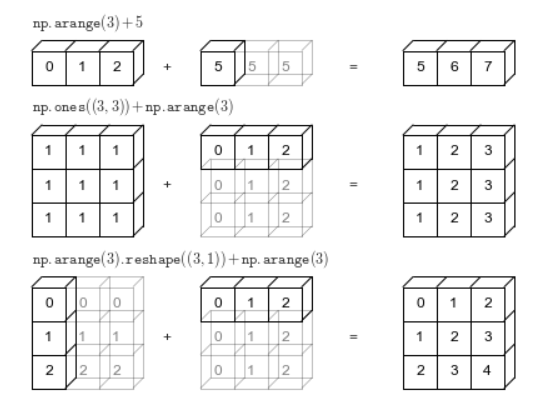

In [74]:
from IPython.display import Image
Image("Broadcasting_img.png")

In [76]:
# Create a 1D array using np.arange
arr1 = np.arange(3)
print(arr1)
# Add a scalar value to the array
result1 = arr1 + 5
print(result1)

[0 1 2]
[5 6 7]


In [77]:
# Create a 2D array of ones
arr2 = np.ones((3, 3))
print(arr2)
# Create a 1D array using np.arange
arr3 = np.arange(3)
print(arr3)
# Add the two arrays together (broadcasting the 1D array across the 2D array)
result2 = arr2 + arr3
print(result2)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [78]:
# Create a 1D array using np.arange
arr4 = np.arange(3)
print(arr4)
# Reshape the array to be 3x1
arr5 = arr4.reshape((3, 1))
print(arr5)
# Add the reshaped array to the original 1D array
result3 = arr5 + arr4
print(result3)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [79]:
# verify above results with image given above

In [80]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [81]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [82]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [83]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [84]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [85]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

In [86]:
# WORKING WITH MATHS FORMULAS

In [92]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [93]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918,  0.98662759,  0.39592515, -0.55878905,
       -0.99975517, -0.521551  ,  0.43616476,  0.99287265,  0.63673801,
       -0.30481062, -0.96611777, -0.7391807 ,  0.1673557 ,  0.92002604,
        0.82682868, -0.02655115, -0.85551998, -0.89792768, -0.11

In [96]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [97]:
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [98]:
actual = np.random.randint(1, 50, 25)
predicted = np.random.randint(1, 50, 25)

In [99]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

In [100]:
mse(actual, predicted)

249.32

In [101]:
# DEALING WITH MISSING VALUES

In [102]:
a = np.array([1,2,3,4, np.nan, 6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [104]:
# NONE IS DIFFERENT THAN NAN  (NAN IS MISSING VALUE NONE IS NOTHING IS THERE ACTUAL NULL)

In [106]:
np.isnan(a) # boolean value so can use boolean masking

array([False, False, False, False,  True, False])

In [107]:
a[~(np.isnan(a))]

array([1., 2., 3., 4., 6.])

In [108]:
# plotting graphs

In [109]:
x = np.linspace(-10, 10, 100)
y = x
y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

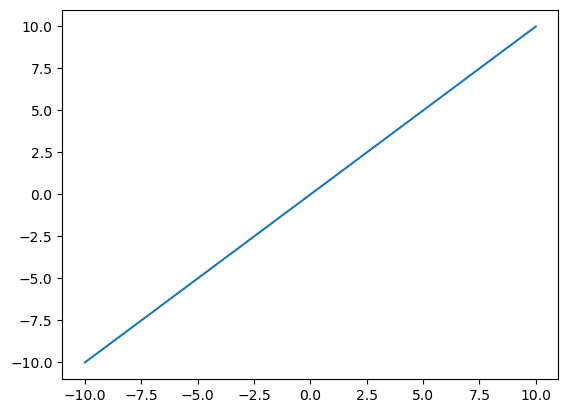

In [110]:
import matplotlib.pyplot as plt
plt.plot(x, y)

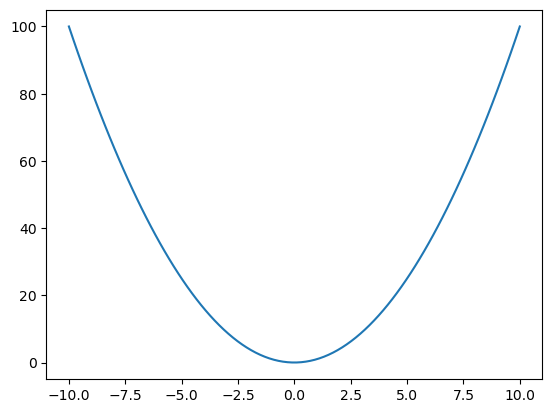

In [111]:
y = x**2
plt.plot(x, y)

C:\Users\athar\AppData\Local\Temp\ipykernel_24528\680770548.py:1: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


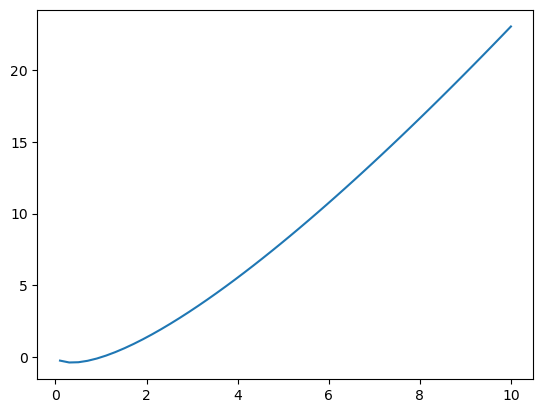

In [113]:
y = x*np.log(x)
plt.plot(x, y)

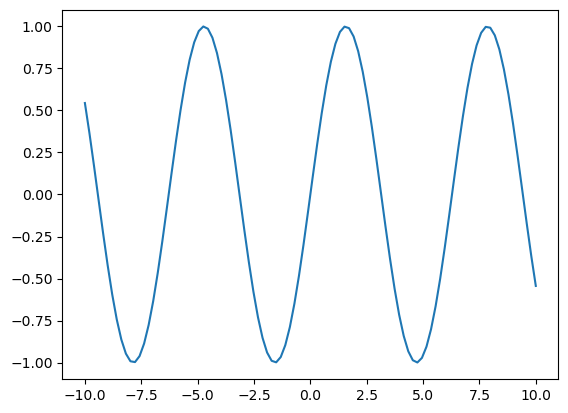

In [115]:
y = np.sin(x)
plt.plot(x, y)

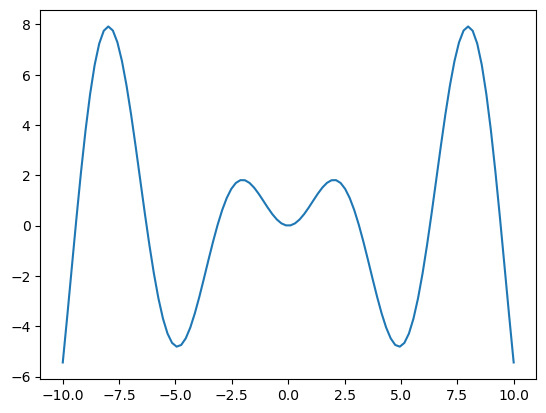

In [117]:
y = x*np.sin(x)
plt.plot(x, y)

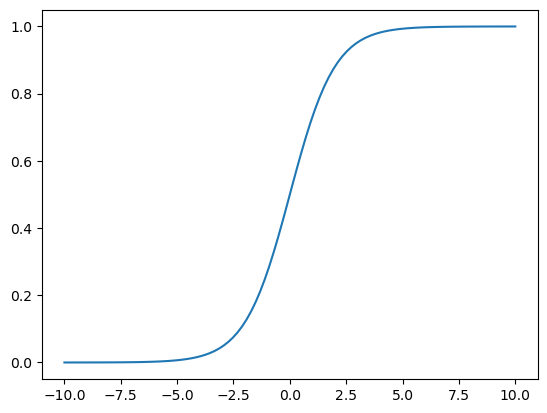

In [118]:
y = sigmoid(x)
plt.plot(x, y)